# Importing flaml and other libraries and reading data

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from flaml import AutoML

In [6]:
data=pd.read_csv("model_data.csv")

In [7]:
data.columns

Index(['age', 'avg_glucose_level', 'bmi', 'stroke', 'age_group',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

# Splitting data

In [8]:
X = data.drop(columns="stroke")
y = data["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [9]:
X

,age,avg_glucose_level,bmi,age_group,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.035645,0.202080,0.108571,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
1,0.707031,0.165028,0.512381,3,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
2,0.096680,0.283689,0.100952,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
3,0.853516,0.067119,0.449524,4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0.169922,0.544452,0.129524,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,0.951172,0.012937,0.226667,4,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
9594,0.975586,0.051542,0.440000,4,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
9595,0.719238,0.805786,0.374660,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
9596,0.707031,0.692248,0.374660,3,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0


# Training model

In [10]:
automl_settings ={
    "time_budget":600,
    "metric":"roc_auc",
    "task":"classification",
    "log_file_name":"automl.log"
    
}

In [11]:
automl = AutoML()
automl.fit(X_train=X_train,y_train=y_train,**automl_settings)

[flaml.automl.logger: 06-04 16:49:48] {1680} INFO - task = classification
[flaml.automl.logger: 06-04 16:49:48] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-04 16:49:48] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 06-04 16:49:48] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-04 16:49:48] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-04 16:49:48] {2345} INFO - Estimated sufficient time budget=1094s. Estimated necessary time budget=25s.
[flaml.automl.logger: 06-04 16:49:48] {2392} INFO -  at 0.2s,	estimator lgbm's best error=0.1617,	best estimator lgbm's best error=0.1617
[flaml.automl.logger: 06-04 16:49:48] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-04 16:49:48] {2392} INFO -  at 0.3s,	estimator lgbm's best error=0.1617,	best estimator lgbm's best error=0.1617
[flaml.automl.logger: 06-04 16:49:4

[flaml.automl.logger: 06-04 16:49:57] {2219} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 06-04 16:49:59] {2392} INFO -  at 11.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:49:59] {2219} INFO - iteration 35, current learner rf
[flaml.automl.logger: 06-04 16:49:59] {2392} INFO -  at 11.4s,	estimator rf's best error=0.1527,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:49:59] {2219} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 06-04 16:50:00] {2392} INFO -  at 11.6s,	estimator extra_tree's best error=0.1952,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:50:00] {2219} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 06-04 16:50:00] {2392} INFO -  at 11.8s,	estimator xgboost's best error=0.1030,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:50:00] {2219} INFO - iteration 38, current learner 

[flaml.automl.logger: 06-04 16:50:24] {2392} INFO -  at 36.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:50:24] {2219} INFO - iteration 70, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:50:24] {2392} INFO -  at 36.4s,	estimator xgb_limitdepth's best error=0.0069,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:50:24] {2219} INFO - iteration 71, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:50:25] {2392} INFO -  at 36.6s,	estimator xgb_limitdepth's best error=0.0058,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:50:25] {2219} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 06-04 16:50:25] {2392} INFO -  at 36.9s,	estimator extra_tree's best error=0.1781,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:50:25] {2219} INFO - iteration 73, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:50:

[flaml.automl.logger: 06-04 16:51:01] {2219} INFO - iteration 105, current learner rf
[flaml.automl.logger: 06-04 16:51:02] {2392} INFO -  at 73.7s,	estimator rf's best error=0.0005,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:02] {2219} INFO - iteration 106, current learner rf
[flaml.automl.logger: 06-04 16:51:02] {2392} INFO -  at 74.0s,	estimator rf's best error=0.0004,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:02] {2219} INFO - iteration 107, current learner extra_tree
[flaml.automl.logger: 06-04 16:51:02] {2392} INFO -  at 74.3s,	estimator extra_tree's best error=0.0629,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:02] {2219} INFO - iteration 108, current learner rf
[flaml.automl.logger: 06-04 16:51:03] {2392} INFO -  at 74.8s,	estimator rf's best error=0.0004,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:03] {2219} INFO - iteration 109, current learner extra_tre

[flaml.automl.logger: 06-04 16:51:30] {2219} INFO - iteration 140, current learner rf
[flaml.automl.logger: 06-04 16:51:31] {2392} INFO -  at 102.5s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:31] {2219} INFO - iteration 141, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:51:33] {2392} INFO -  at 104.6s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:33] {2219} INFO - iteration 142, current learner rf
[flaml.automl.logger: 06-04 16:51:33] {2392} INFO -  at 105.2s,	estimator rf's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:33] {2219} INFO - iteration 143, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:51:34] {2392} INFO -  at 105.7s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:34] {2219} INFO - iter

[flaml.automl.logger: 06-04 16:51:55] {2392} INFO -  at 127.2s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:55] {2219} INFO - iteration 176, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:51:56] {2392} INFO -  at 127.5s,	estimator xgb_limitdepth's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:56] {2219} INFO - iteration 177, current learner extra_tree
[flaml.automl.logger: 06-04 16:51:56] {2392} INFO -  at 128.0s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:56] {2219} INFO - iteration 178, current learner extra_tree
[flaml.automl.logger: 06-04 16:51:56] {2392} INFO -  at 128.4s,	estimator extra_tree's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 06-04 16:51:56] {2219} INFO - iteration 179, current learner extra_tree
[flaml.automl.logger: 06-04 16:5

[flaml.automl.logger: 06-04 16:52:39] {2392} INFO -  at 170.8s,	estimator xgboost's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:52:39] {2219} INFO - iteration 211, current learner extra_tree
[flaml.automl.logger: 06-04 16:52:39] {2392} INFO -  at 171.4s,	estimator extra_tree's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:52:39] {2219} INFO - iteration 212, current learner extra_tree
[flaml.automl.logger: 06-04 16:52:40] {2392} INFO -  at 171.9s,	estimator extra_tree's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:52:40] {2219} INFO - iteration 213, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:52:41] {2392} INFO -  at 172.7s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:52:41] {2219} INFO - iteration 214, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:52:4

[flaml.automl.logger: 06-04 16:53:24] {2392} INFO -  at 215.6s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:53:24] {2219} INFO - iteration 246, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:53:24] {2392} INFO -  at 216.2s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:53:24] {2219} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 06-04 16:53:26] {2392} INFO -  at 218.2s,	estimator xgboost's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:53:26] {2219} INFO - iteration 248, current learner rf
[flaml.automl.logger: 06-04 16:53:27] {2392} INFO -  at 219.2s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:53:27] {2219} INFO - iteration 249, current learner extra_tree
[flaml.automl.logger: 06-04 16:53:28] {2392} INFO -  at 219.6s,	

[flaml.automl.logger: 06-04 16:54:06] {2392} INFO -  at 258.4s,	estimator extra_tree's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:06] {2219} INFO - iteration 281, current learner rf
[flaml.automl.logger: 06-04 16:54:07] {2392} INFO -  at 259.2s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:07] {2219} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 06-04 16:54:09] {2392} INFO -  at 261.1s,	estimator xgboost's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:09] {2219} INFO - iteration 283, current learner rf
[flaml.automl.logger: 06-04 16:54:10] {2392} INFO -  at 261.8s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:10] {2219} INFO - iteration 284, current learner lrl1
[flaml.automl.logger: 06-04 16:54:10] {2392} INFO -  at 262.3s,	estimator lrl1's best 

C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-04 16:54:11] {2392} INFO -  at 263.4s,	estimator lrl1's best error=0.1543,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:11] {2219} INFO - iteration 287, current learner lrl1


C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-04 16:54:12] {2392} INFO -  at 263.7s,	estimator lrl1's best error=0.1543,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:12] {2219} INFO - iteration 288, current learner lrl1


C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-04 16:54:13] {2392} INFO -  at 264.5s,	estimator lrl1's best error=0.1543,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:13] {2219} INFO - iteration 289, current learner rf
[flaml.automl.logger: 06-04 16:54:13] {2392} INFO -  at 265.0s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:13] {2219} INFO - iteration 290, current learner rf
[flaml.automl.logger: 06-04 16:54:14] {2392} INFO -  at 266.1s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:14] {2219} INFO - iteration 291, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:54:15] {2392} INFO -  at 266.8s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:15] {2219} INFO - iteration 292, current learner xgboost
[flaml.automl.logger: 06-04 16:54:17] {2392} INFO -  at 268.5s,	estimator x

[flaml.automl.logger: 06-04 16:54:56] {2219} INFO - iteration 324, current learner rf
[flaml.automl.logger: 06-04 16:54:57] {2392} INFO -  at 309.1s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:57] {2219} INFO - iteration 325, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:54:58] {2392} INFO -  at 309.9s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:54:58] {2219} INFO - iteration 326, current learner xgboost
[flaml.automl.logger: 06-04 16:55:01] {2392} INFO -  at 312.7s,	estimator xgboost's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:55:01] {2219} INFO - iteration 327, current learner extra_tree
[flaml.automl.logger: 06-04 16:55:01] {2392} INFO -  at 313.1s,	estimator extra_tree's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:55:01] {2219} INFO - itera

[flaml.automl.logger: 06-04 16:55:31] {2219} INFO - iteration 359, current learner rf
[flaml.automl.logger: 06-04 16:55:32] {2392} INFO -  at 344.0s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:55:32] {2219} INFO - iteration 360, current learner extra_tree
[flaml.automl.logger: 06-04 16:55:33] {2392} INFO -  at 344.5s,	estimator extra_tree's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:55:33] {2219} INFO - iteration 361, current learner rf
[flaml.automl.logger: 06-04 16:55:33] {2392} INFO -  at 345.2s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:55:33] {2219} INFO - iteration 362, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:55:42] {2392} INFO -  at 353.6s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:55:42] {2219} INFO - iteration 363

[flaml.automl.logger: 06-04 16:56:49] {2392} INFO -  at 420.7s,	estimator lgbm's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:56:49] {2219} INFO - iteration 395, current learner xgboost
[flaml.automl.logger: 06-04 16:56:51] {2392} INFO -  at 423.4s,	estimator xgboost's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:56:51] {2219} INFO - iteration 396, current learner rf
[flaml.automl.logger: 06-04 16:56:53] {2392} INFO -  at 424.6s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:56:53] {2219} INFO - iteration 397, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:56:53] {2392} INFO -  at 425.0s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:56:53] {2219} INFO - iteration 398, current learner rf
[flaml.automl.logger: 06-04 16:56:54] {2392} INFO -  at 425.8s,	estimat

[flaml.automl.logger: 06-04 16:57:50] {2392} INFO -  at 482.4s,	estimator lgbm's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:57:50] {2219} INFO - iteration 430, current learner xgboost
[flaml.automl.logger: 06-04 16:57:52] {2392} INFO -  at 483.8s,	estimator xgboost's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:57:52] {2219} INFO - iteration 431, current learner rf
[flaml.automl.logger: 06-04 16:57:53] {2392} INFO -  at 484.8s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:57:53] {2219} INFO - iteration 432, current learner lgbm
[flaml.automl.logger: 06-04 16:57:57] {2392} INFO -  at 488.5s,	estimator lgbm's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:57:57] {2219} INFO - iteration 433, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:57:57] {2392} INFO -  at 489.1s,	estimator xgb_l

[flaml.automl.logger: 06-04 16:58:32] {2392} INFO -  at 524.0s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:58:32] {2219} INFO - iteration 465, current learner rf
[flaml.automl.logger: 06-04 16:58:33] {2392} INFO -  at 525.0s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:58:33] {2219} INFO - iteration 466, current learner rf
[flaml.automl.logger: 06-04 16:58:34] {2392} INFO -  at 525.8s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:58:34] {2219} INFO - iteration 467, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:58:34] {2392} INFO -  at 526.4s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:58:34] {2219} INFO - iteration 468, current learner rf
[flaml.automl.logger: 06-04 16:58:35] {2392} INFO -  at 527.1s,	estimator rf's be

[flaml.automl.logger: 06-04 16:59:11] {2219} INFO - iteration 500, current learner rf
[flaml.automl.logger: 06-04 16:59:12] {2392} INFO -  at 563.7s,	estimator rf's best error=-0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:59:12] {2219} INFO - iteration 501, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:59:12] {2392} INFO -  at 563.9s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:59:12] {2219} INFO - iteration 502, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:59:12] {2392} INFO -  at 564.3s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:59:12] {2219} INFO - iteration 503, current learner xgb_limitdepth
[flaml.automl.logger: 06-04 16:59:13] {2392} INFO -  at 564.8s,	estimator xgb_limitdepth's best error=0.0000,	best estimator rf's best error=-0.0000
[flaml.automl.logger: 06-04 16:59:1

# Model score

In [25]:
automl.model

In [13]:
y_pred = automl.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.98125

# Model parameters

In [15]:
automl.model.get_params()

{'n_estimators': 29,
 'max_features': 0.7795179477357456,
 'criterion': 'entropy',
 'n_jobs': -1,
 'max_leaf_nodes': 889,
 'random_state': 12032022,
 'verbose': 0,
 'task': <flaml.automl.task.generic_task.GenericTask at 0x225a62bb810>,
 '_estimator_type': 'classifier'}

# Feature importances for model

In [28]:
fs = automl.feature_importances_
feature_names = X.columns

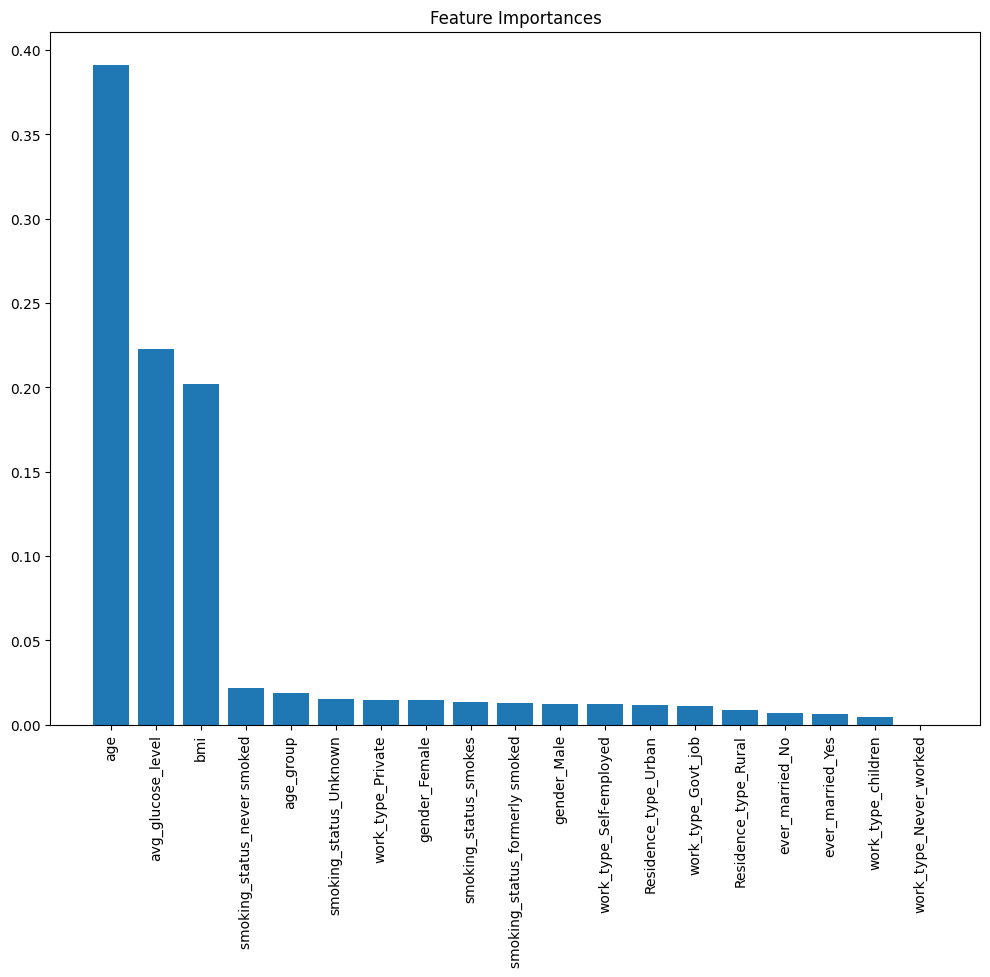

In [29]:
feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)
plt.show()

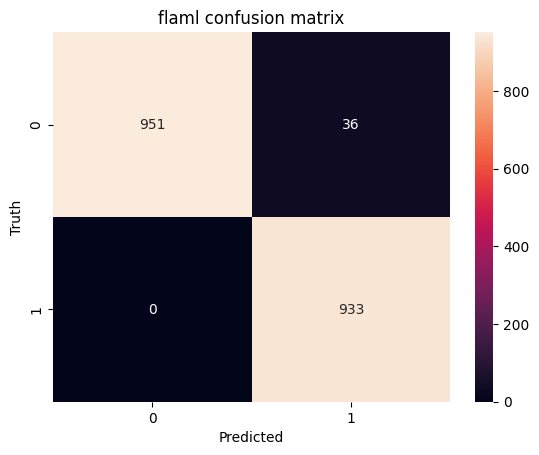

In [22]:
y_predicted = automl.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"flaml confusion matrix")
plt.show()